# Práctica 2 — Campeonato de predicción

A continuación se presentan 6 escenarios distintos, 6 casos de estudio donde, dados unos datos y/o condiciones, se te pedirá que realices una estimación o predicción sobre una variable. 

Puedes utilizar los conceptos vistos en el curso para resolver alguno de los casos propuestos, pero te recomiendo que no te limites a los métodos estudiados en esta asignatura. La práctica tiene un alto componente exploratorio y de investigación, los problemas son deliberadamente abiertos y no estructurados para permitir varios enfoques. Sé creativo.

Para resolver esta práctica, puedes utilizar cualquier módulo externo, usar IAs para inspirarte, buscar problemas análogos online, etc. Todo está permitido. Eso sí, asegúrate de que justificas bien tus decisiones, en particular, los métodos o algoritmos que vas a usar para obtener cada una de las predicciones. Recuerda también citar tus fuentes.


### Instrucciones para la entrega

La práctica puede realizarse en grupos de dos personas como máximo. Debe subirse a Moodle antes de las **23:59 del 20 de Noviembre de 2024**. Aunque desarrolles la práctica en grupo, cada miembro del grupo debe realizar la entrega individualmente. Entrega este mismo documento (el ```ipynb```) relleno con tus argumentos y respuestas. En particular, asegúrate de que describes con precisión tu proceso exploratorio hasta llegar a la solución final propuesta. No valen respuestas del tipo "*He usado este algoritmo porque me lo ha dicho ChatGPT*". Debes experimentar con el método que propones, compararlo con otros, argumentar por qué funciona en el contexto planteado, por qué no has usado otros métodos, etc. En la entrega, incluye todas las pruebas que hagas, incluso con algoritmos o métodos que finalmente hayas descartado. Piensa en este *notebook* como una especie de *diario de investigación* donde vayas reflejando tus experimentos.

Además, debes rellenar la siguiente celda, para dejar claras tus predicciones para los 6 escenarios:

In [ ]:
# RESPUESTAS: Predicciones/estimaciones. Rellena cada fila con un único valor numérico
# 1. 225.61243
# 2. 15780.633838383834 m^2
# 3. 2.716
# 4. 4.60 euros
# 5. 26.5 cm
# 6. 4 corners

### Evaluación

Se tendrán en cuenta las siguientes consideraciones a la hora de evaluar la práctica:
 1. Idoneidad de los método predictivos propuestos.
 2. Experimentación suficiente y rigurosa.
 3. Discusión crítica de resultados.
 4. Limpieza de código y estilo.
 5. Citas y referencias apropiadas.

Además, si resultas ganador del campeonato, obtendrás **1.5 puntos extra** en la nota de esta práctica (pudiendo obtener una nota superior a 10).

### Reglas del campeonato

Se evaluará cada caso independientemente. Para cada caso, se hará un ranking con todos los participantes, ordenándolos de menor a mayor error en las predicciones realizadas en comparación con el valor exacto. En cada caso, el primer clasificado obtendrá 5 puntos, el segundo 3 y el tercero 1. Ganará el campeonato el grupo que más puntos acumule en los 6 casos.

------------------
## Caso 1 — Serie temporal de una variable econométrica

El siguiente archivo ( ```csv```) contiene la evolución temporal de una variable econométrica:

[Descarga estos datos](https://drive.upm.es/s/to88gulrpHxLxjB/download)

Los datos incluyen dos columnas. La primera es una fecha (tiempo), y la segunda es el valor econométrico a estudiar. Crea un modelo predictivo y predice el valor de la variable econométrica a fecha 1 de enero de 2023.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Preprocesamiento:

En primer lugar vamos a preprocesar los datos para que los datos dados se encuentren entre 0 y 1 mediante un min max scaler, los vamos a poner en forma matricial y a separar en trin y test

In [2]:
#leer csv

ruta_datos = "forecast_data.csv"
data = pd.read_csv(ruta_datos)

In [3]:
#Preprocesado de values

values = data['value'].values.reshape(-1, 1)
value_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = value_scaler.fit_transform(values)

In [4]:
#Preprocesado de dates

data['date'] = pd.to_datetime(data['date'])
dates = data['date']

timpe_stamps = data.date.astype('int64').values.reshape(-1, 1)

date_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dates = date_scaler.fit_transform(timpe_stamps)

In [5]:
#generacion de matrices de entrenamiento

X = scaled_dates
y = scaled_values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creacion de un modelo con tensorflow

A continuacion creamos un modelo con tensorflow de una sola entrada algunas capas intermedias y una sola salida y lo entrenamos con las matrices que hemos generado.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Configuración del modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para un único valor de predicción
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

c:\Users\34640\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1904 - mae: 0.3723 - val_loss: 0.1077 - val_mae: 0.2670
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1087 - mae: 0.2707 - val_loss: 0.0957 - val_mae: 0.2502
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0908 - mae: 0.2428 - val_loss: 0.0735 - val_mae: 0.2208
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0731 - mae: 0.2183 - val_loss: 0.0556 - val_mae: 0.1936
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0564 - mae: 0.1968 - val_loss: 0.0407 - val_mae: 0.1670
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0366 - mae: 0.1611 - val_loss: 0.0287 - val_mae: 0.1396
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261 - mae: 0.1345 - val_loss: 0.0236 - val_mae: 0.1240
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mae: 0.1227 - val_loss: 0.0230 - val_mae: 0.1230
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - mae:

## Resultados e ideas de mejora

Ploteamos los resultados y vemos un resultado bastante malo, creemos que debido que el modelo toma un dato como entrada no puede aprender patrones mas complejos. Hemos visto que este se puede resolver con un modelado LSTM, aunque este modelo requiere un preprocesamiento mucho más concreto que detallamos a continacion, pero fuciona mejor en series temporales.

In [7]:
# Evaluación del modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae}")

Mean Absolute Error on Test Data: 0.11806873232126236


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


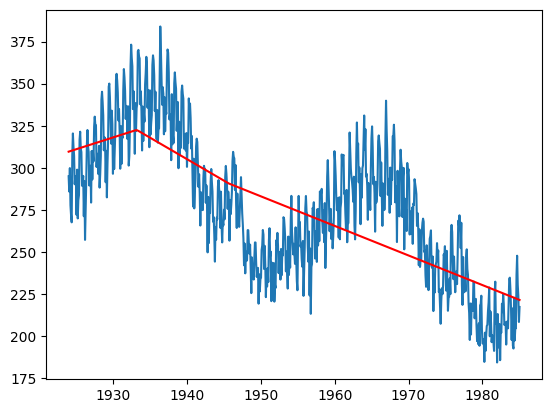

In [8]:
x_original = dates.values
y_original = values

plt.plot(x_original, y_original)
plt.plot(x_original, value_scaler.inverse_transform(model.predict(X)), "r")


## Implementacion del modelo LSTM

La diferencia principal a la hora de tratar estos modelos está en las mastrices de entrenamiento que tienen un shape con las siguiente estructura (samples, n_steps, features), en este caso elegimos un n_steps de 10, y tendremos una sola feature (samples, 10, 1) por lo que la matriz de entrenamiento se construye del siguiente modo.

Dada una lista de datos:
$$
\textbf{lista} = [x_1, x_2, x_3, \dots, x_{N}]
$$

Construimos una matriz **M** de \(n\_steps\) secuencias, donde cada secuencia se desplaza un término con respecto a la anterior:

$$\text{M} =
\begin{bmatrix}
x_1 & x_2 & x_3 & \dots & x_{n\_steps} \\
x_2 & x_3 & x_4 & \dots & x_{n\_steps + 1} \\
x_3 & x_4 & x_5 & \dots & x_{n\_steps + 2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{N - n\_steps + 1} & x_{N - n\_steps + 2} & \dots & x_{N}
\end{bmatrix}
$$

**Pasos:**
1. Elegir un tamaño fijo de secuencia \(n\_steps\).
2. Para cada \(i\) de \(1\) a \(N - n\_steps + 1\), construir una fila:
$$
\textbf{fila}_i = [x_i, x_{i+1}, x_{i+2}, \dots, x_{i + n\_steps - 1}]
$$

**Ejemplo**

Si **lista** = [1, 2, 3, 4, 5, 6] y n_steps = 3, entonces:

$$
\textbf{M} =
\begin{bmatrix}
1 & 2 & 3 \\
2 & 3 & 4 \\
3 & 4 & 5 \\
4 & 5 & 6
\end{bmatrix}
$$

In [9]:
#Aplicamos este nuevo preprocesamiento.

def create_sequences(x, y, n_steps):
    sequences = []
    targets = []
    for i in range(len(data) - n_steps):
        seq = x[i:i + n_steps]
        target = y[i + n_steps]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Parámetro de longitud de la secuencia
n_steps = 10  # Secuencia de 10 pasos para predecir el siguiente

# Crear secuencias para X y y
X_sequences, y_sequences = create_sequences(scaled_dates, scaled_values, n_steps)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=0
)

# Ajustar la forma para LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [10]:
#Estos son los resultados que esperabamos

print(X_train.shape)
print(X_train)

(587, 10, 1)
[[[0.13055182]
  [0.13189771]
  [0.13324361]
  ...
  [0.13997308]
  [0.14131898]
  [0.14266487]]

 [[0.6769852 ]
  [0.67833109]
  [0.67967699]
  ...
  [0.68640646]
  [0.68775236]
  [0.68909825]]

 [[0.86675639]
  [0.86810229]
  [0.86944818]
  ...
  [0.87617766]
  [0.87752355]
  [0.87886945]]

 ...

 [[0.84656797]
  [0.84791386]
  [0.84925976]
  ...
  [0.85598923]
  [0.85733513]
  [0.85868102]]

 [[0.75235532]
  [0.75370121]
  [0.75504711]
  ...
  [0.76177658]
  [0.76312248]
  [0.76446837]]

 [[0.92059219]
  [0.92193809]
  [0.92328398]
  ...
  [0.93001346]
  [0.93135935]
  [0.93270525]]]


In [11]:
# Crear el modelo LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_steps, 1)),  # Primera capa LSTM
    Dropout(0.2),  # Regularización
    LSTM(32, return_sequences=False),  # Segunda capa LSTM
    Dense(16, activation='relu'),  # Capa densa para procesar las características
    Dense(1)  # Salida para predecir un único valor
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200


c:\Users\34640\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2247 - mae: 0.4166 - val_loss: 0.0892 - val_mae: 0.2427
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0951 - mae: 0.2489 - val_loss: 0.0464 - val_mae: 0.1755
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mae: 0.1851 - val_loss: 0.0207 - val_mae: 0.1177
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0266 - mae: 0.1372 - val_loss: 0.0189 - val_mae: 0.1058
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0265 - mae: 0.1339 - val_loss: 0.0195 - val_mae: 0.1110
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - mae: 0.1273 - val_loss: 0.0183 - val_mae: 0.1074
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - mae: 0.1257 - val_loss: 0.0171 - val_mae: 0.1026
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0240 - mae: 0.1307 - val_loss: 0.0164 - val_mae: 0.1006
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0235 - mae: 0.

Al plotear los resultados vemos unos resultados mucho mas prometedores vamos a plotear ahora la prediccion futura junto a la de los datos para que tak ha generalizado

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


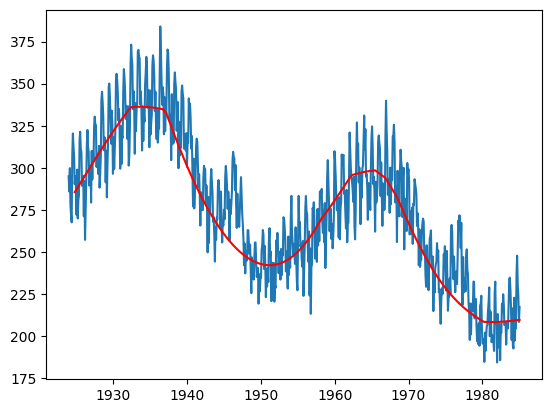

In [12]:
plt.plot(x_original, y_original)
plt.plot(x_original[n_steps:], value_scaler.inverse_transform(model.predict(X_sequences)), "r")

In [13]:
# Generar la secuencia de fechas desde 1985-01-10 hasta 2024-01-01, cada primero de mes
start_date = "1985-01-10"
end_date = "2100-01-01"

# Generar las fechas usando
new_dates = pd.date_range(start=start_date, end=end_date, freq="MS") 
timpe_stamps = new_dates.astype('int64').values.reshape(-1, 1)
new_scaled_dates = date_scaler.transform(timpe_stamps)

In [14]:
#Crear secuencias con la estructura necesaria ahora solo con datos X

def create_sequences(scaled_dates, n_steps):
    sequences = []
    for i in range(len(scaled_dates) - n_steps):
        seq = scaled_dates[i:i + n_steps]
        sequences.append(seq)
    return np.array(sequences)

In [15]:
reshaped_new_scaled_dates = create_sequences(new_scaled_dates, n_steps)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


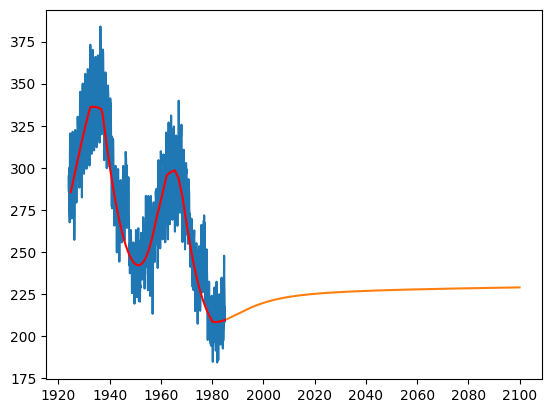

In [16]:
plt.plot(x_original, y_original)
plt.plot(x_original[n_steps:], value_scaler.inverse_transform(model.predict(X_sequences)), "r")
plt.plot(new_dates[n_steps:], value_scaler.inverse_transform(model.predict(reshaped_new_scaled_dates)))

# Analisis e ideas:

Parece que el modelo no generaliza nada bien en el futuro, en concreto, ha ignorado por completo la naturaleza periodica de los datos de partida. Tenemos dos ideeas para corregir este comprotamiento:

- Abandona las redes neuronales y hacer un desarrollo que consista en regresion usando como base funciones periodicas como el seno y el coseno (basandonos en [Series de Fourier](https://es.wikipedia.org/wiki/Serie_de_Fourier)
) para ganarantizar que se aprenda esta naturaleza de los datos.
- Reforzar la la idea de periodicidad al modelo mediante un segundo parametro que funciones como "fase".

Elegimos desarrollar esta segunda idea ya que reutiliza la mayoria del trabajo anterior.


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


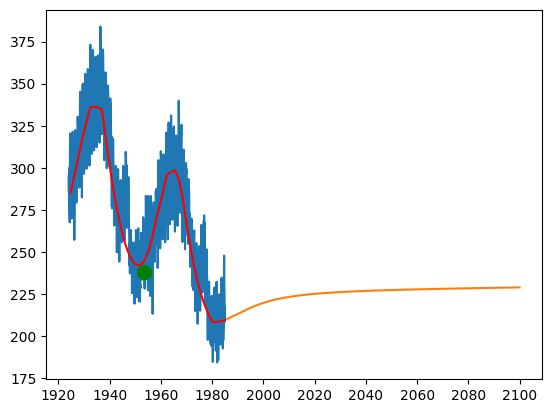

In [17]:
i = 360

plt.plot(x_original, y_original)
plt.plot(x_original[n_steps:], value_scaler.inverse_transform(model.predict(X_sequences)), "r")
plt.plot(new_dates[n_steps:], value_scaler.inverse_transform(model.predict(reshaped_new_scaled_dates)))
plt.scatter(dates[i], values[i], s = [100], color='green', zorder = 10)


Por tanto vamos a buscar el "periodo" de nuestra funcion.

In [18]:
periodo_escalado = scaled_dates[i][0]
print(periodo_escalado)

0.4845222072678331


### Preprocesamiento

Es análogo al que hemos explicado antes, solo que ahora, el objeticvo es una matriz de entrenamiento (samples, 10, 2), con dos parametros en vez de uno.

In [19]:
raw_X = np.hstack((scaled_dates, scaled_dates % periodo_escalado))
X = create_sequences(raw_X, n_steps)
Y = scaled_values[n_steps:]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
x_train.shape

(587, 10, 2)

In [22]:
# Crear el modelo LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_steps, 2)),  # Cambiar el número de características a 2
    Dropout(0.2),  # Regularización
    LSTM(32, return_sequences=False),  # Segunda capa LSTM
    Dense(16, activation='relu'),  # Capa densa para procesar las características
    Dense(1)  # Salida para predecir un único valor
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200


c:\Users\34640\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2203 - mae: 0.4129 - val_loss: 0.0778 - val_mae: 0.2256
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0889 - mae: 0.2438 - val_loss: 0.0347 - val_mae: 0.1537
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - mae: 0.1556 - val_loss: 0.0185 - val_mae: 0.1068
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - mae: 0.1217 - val_loss: 0.0153 - val_mae: 0.0966
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mae: 0.1119 - val_loss: 0.0170 - val_mae: 0.0997
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0195 - mae: 0.1131 - val_loss: 0.0156 - val_mae: 0.0954
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0194 - mae: 0.1137 - val_loss: 0.0161 - val_mae: 0.0968
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0208 - mae: 0.1173 - val_loss: 0.0170 - val_mae: 0.0987
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0187 - mae: 0.

Preparamos un plot como el anterior.

In [23]:
#prediccion futuro:

# Generar las fechas usando pd.date_range
new_dates = pd.date_range(start=start_date, end=end_date, freq="MS")
timpe_stamps = new_dates.astype('int64').values.reshape(-1, 1)
new_scaled_dates = date_scaler.transform(timpe_stamps)


new_scaled_dates = np.hstack((new_scaled_dates, new_scaled_dates % periodo_escalado))
reshaped_new_scaled_dates = create_sequences(new_scaled_dates, n_steps)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


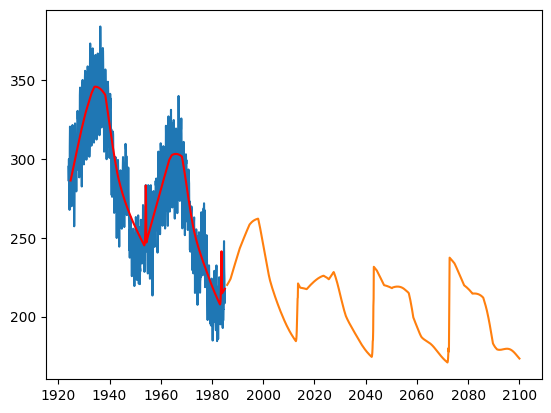

In [24]:
plt.plot(x_original, y_original)
plt.plot(x_original[n_steps:], value_scaler.inverse_transform(model.predict(X)), "r")
plt.plot(new_dates[n_steps:], value_scaler.inverse_transform(model.predict(reshaped_new_scaled_dates)))

## Analisis e ideas:

Parece que este último metodo si que ha sido bastante exitoso, por lo que pasamos a recuperar el valor que nos pedian al principio del ejercicio, y lo pleteamos a continuacion.

In [25]:
indice = np.where(new_dates[n_steps:] == pd.Timestamp("2023-01-01"))[0][0]
date = pd.Timestamp("2023-01-01")
valor_predicho = value_scaler.inverse_transform(model.predict(reshaped_new_scaled_dates))[indice]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


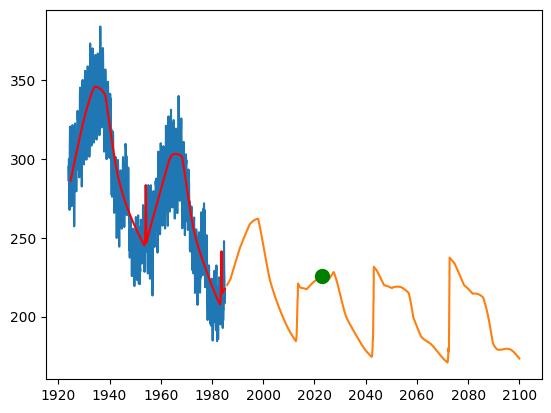

In [26]:
plt.plot(x_original, y_original)
plt.plot(x_original[n_steps:], value_scaler.inverse_transform(model.predict(X)), "r")
plt.plot(new_dates[n_steps:], value_scaler.inverse_transform(model.predict(reshaped_new_scaled_dates)))
plt.scatter(date, valor_predicho, s = [100], color='green', zorder = 10)

In [27]:
print(valor_predicho)

[225.61243]


------------------
## Caso 2 — Estimación de un área

En clase habrás recibido una hoja que contiene un área. La misma hoja contiene información sobre la escala. Realiza una estimación del área encerrada. 

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from PIL import ImageDraw

### Metodología

Para esta práctica, hemos decidido escanear la hoja con el área delimitada y trabajar con la imagen resultante. Utilizaremos las librerías **OpenCV** y **Pillow** para el procesamiento de imágenes.



### 1. **Binarización de la imagen**:  
   En esta primera etapa, convertimos la imagen a tonos de blanco y negro. Esto nos permitirá dividir los píxeles entre dos categorías: los que están dentro del área (blancos) y los que están fuera (negros).  
   De esta manera, será más sencillo calcular el área encerrada posteriormente.

In [29]:
# Cargamos la imagen 
imagen = cv2.imread('imagen_A4.png', cv2.IMREAD_GRAYSCALE) #en tonalidad de grises

# Binarizamos la imagen (umbrales en 127 para dividir en blanco/negro)
_, imagen_binarizada = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY) 

# Guardamos la imagen binarizada
cv2.imwrite('imagen_binarizada.png', imagen_binarizada) 

True

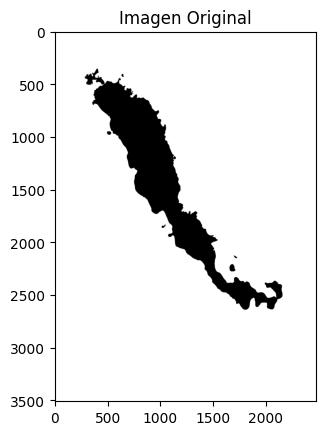

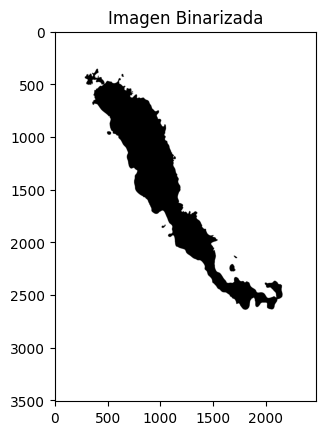

In [30]:
# Mostrar la imagen original
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.show()

# Mostrar la imagen binarizada
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.show()

### 2. **Visualización de la malla sobre la imagen binarizada**

Para facilitar la estimación del área encerrada, hemos implementado la función `visualize_equis_mesh`, que superpone una malla equispaciada de tamaño ajustable sobre la imagen binarizada. Esto nos permite dividir la imagen en secciones discretas, facilitando el cálculo del área aproximada mediante un conteo de píxeles dentro de cada celda.

### Nuestra aproximación
El enfoque inicial consistió en construir una malla equiespaciada en la que se cuenta cuántas celdas contienen píxeles negros y cuáles están completamente en blanco. Para el conteo de celdas con píxeles negros, establecemos dos métodos:

1. **Cota superior**: Toda celda que contenga al menos un píxel negro será considerada negra.
2. **Cota inferior**: Solo las celdas cuyos píxeles sean **todos negros** se considerarán negras.

Gracias al **teorema del sándwich** ([Wikipedia](https://es.wikipedia.org/wiki/Teorema_del_emparedado#Versiones)), los límites convergerán, permitiéndonos calcular un área aproximada en píxeles. Este enfoque asegura una estimación razonable y cuantitativa del área encerrada.

In [31]:
def visualize_equis_mesh(binarized_image, h:int):

    '''
    parameters:
    - h -> int, the size of the mesh you wanna build in pixels
    - binarized_image -> numpy.ndarray, the image you wanna overlay the mesh on

    output:
    - numpy.ndarray, thee image with the mesh overlay in RGB format, suitable for matplotlib plotting

    notes:
    - the mesh is drawn with green lines (color code: (0, 255, 0)).
    '''

    mesh_image = cv2.cvtColor(binarized_image, cv2.COLOR_GRAY2BGR)

    height, width = mesh_image.shape[:2] # shape -> (height, width, channerls)

    for x in range(0, width, h):
        cv2.line(mesh_image, (x, 0), (x, height), (0, 255, 0), 1)
        # parameter:(image, initial point, final point, color, size of the line: 1 pixel)

    for y in range(0, height, h):
        cv2.line(mesh_image, (0, y), (width, y), (0, 255, 0), 1)
    
    mesh_image_rgb = cv2.cvtColor(mesh_image, cv2.COLOR_BGR2RGB) #covert the image to rgb for matpl

    return mesh_image_rgb

In [32]:
def count_any_black_cells(image, h: int): # upper bound
    '''
    parameter:
    - h -> cell size in pixels, width and height of the grid squares
    - image -> numpy.ndarray, The binarized image to analyze (pixels = 0 or 255)

    output:
    - int tthe number of cells that contain at least one black pixel (value 0)

    notes:
    - if the cell contains at least 1 black pixel it is consider black
    - the grid is formed by dividing the image into equispaced cells of size hxh
    '''
    black_cells = 0
    height, width = image.shape

    for y in range(0, height, h):
        for x in range(0, width, h):
            cell = image[y:y+h, x:x+h] # extrar the submatrix that corresponds to that cell

            if np.any(cell == 0): #check if any pixel is black
                black_cells += 1

    return black_cells

In [ ]:
def count_all_black_cells(image, h: int): #lower bound
    '''
    parameter:
    - h -> cell size in pixels, width and height of the grid squares
    - image -> numpy.ndarray, The binarized image to analyze (pixels = 0 or 255)

    output:
    - int, tthe number of cells that contain at least one black pixel (value 0)

    notes:
    - if if all its pixels are black, it is consider black
    - the grid is formed by dividing the image into equispaced cells of size hxh
    '''
    black_cells = 0
    height, width = image.shape

    for y in range(0, height, h):
        for x in range(0, width, h):
            cell = image[y:y+h, x:x+h] # extrar the submatrix that corresponds to that cell

            if np.all(cell == 0): #check if all pixel are black
                black_cells += 1

    return black_cells

In [ ]:
def area(number_of_cells: int, h: int): #in pixels
    """
    returns the total area of a set of cells.

    notes:
    - tthe area of a single cell is h * h 
    - yotal area is the number of cells multiplied by the area of one cell
    """
    cell_area = h * h

    total_area = number_of_cells * cell_area

    return total_area

For h = 50:
upper bound : 418 cells, area = 1045000 pixels^2
lower bound : 213 cells, area = 532500 pixels^2


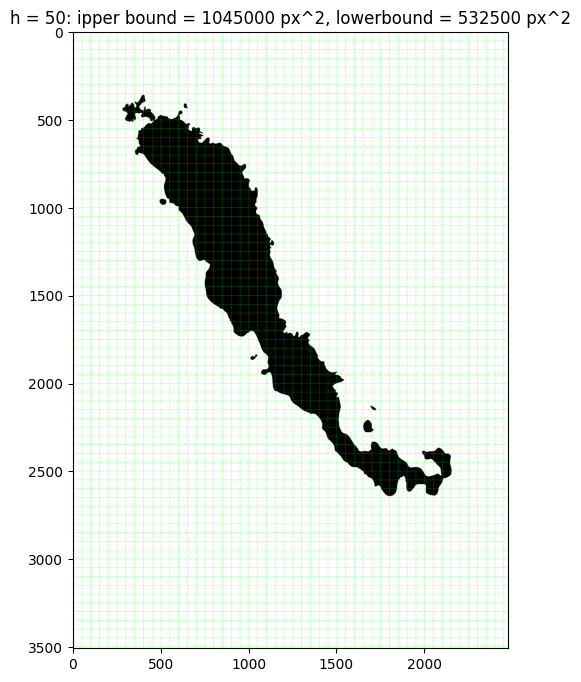

For h = 25:
upper bound : 1477 cells, area = 923125 pixels^2
lower bound : 1028 cells, area = 642500 pixels^2


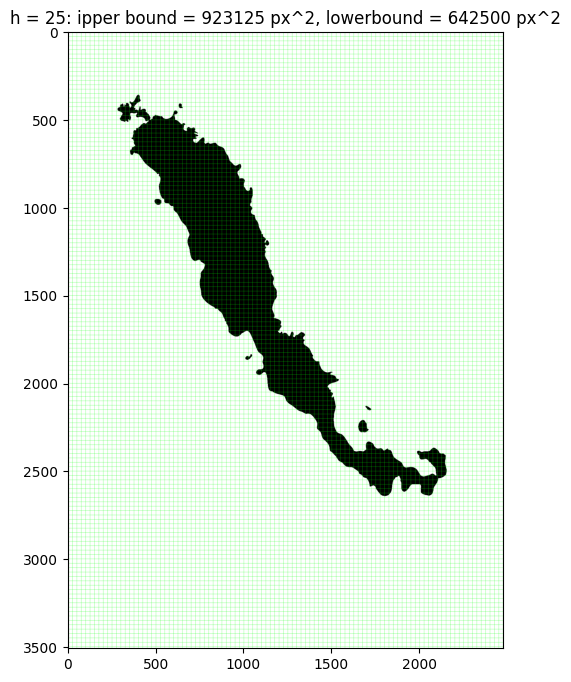

For h = 10:
upper bound : 8403 cells, area = 840300 pixels^2
lower bound : 7281 cells, area = 728100 pixels^2


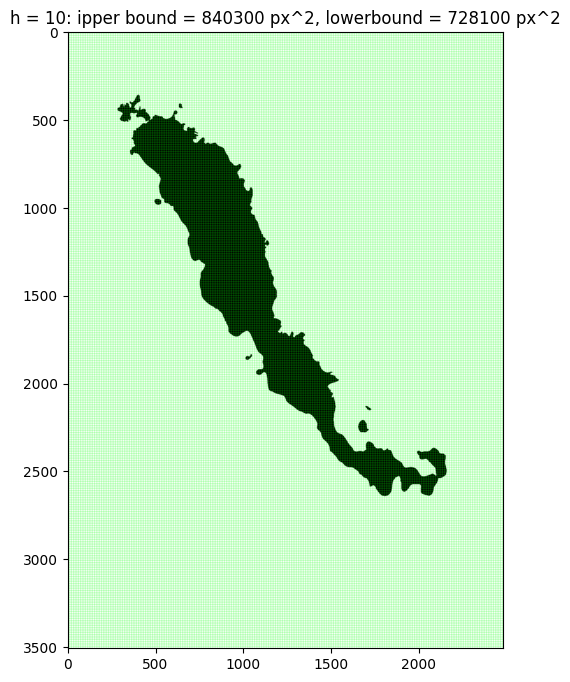

For h = 5:
upper bound : 32295 cells, area = 807375 pixels^2
lower bound : 30292 cells, area = 757300 pixels^2


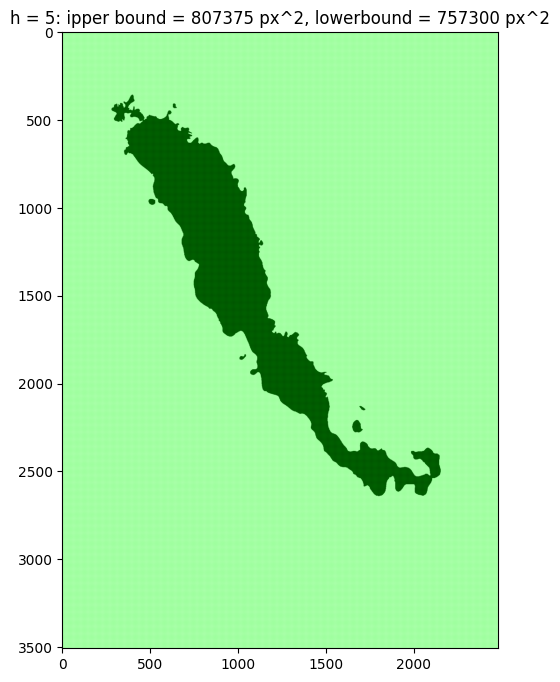

For h = 1:
upper bound : 782583 cells, area = 782583 pixels^2
lower bound : 782583 cells, area = 782583 pixels^2


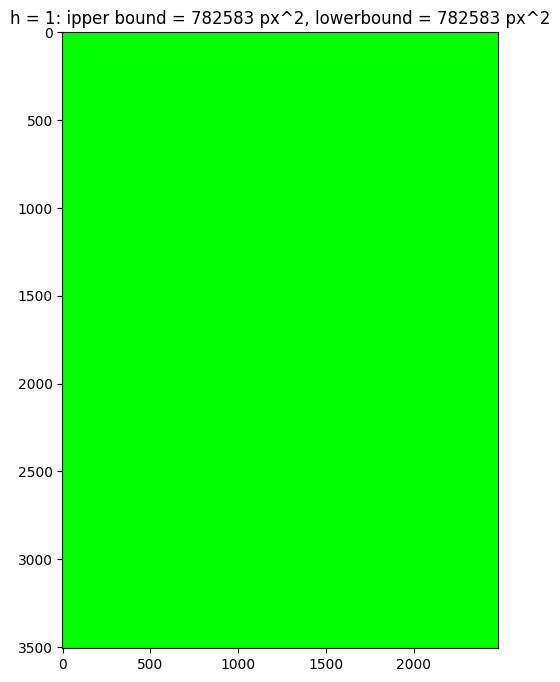

h = 0.5 (invalid cell size for pixels, skip)


In [37]:
# image = cv2.imread('mancha_coloreada.png', cv2.IMREAD_GRAYSCALE)
# _, bin_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
# bin_image = bin_image.astype('uint8')

# # Cargamos  imagen 
# imagen = cv2.imread('imagen_A4.png', cv2.IMREAD_GRAYSCALE) #en tonalidad de grises

# _, imagen_binarizada = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY) 

# # Guardamos la imagen binarizada
# cv2.imwrite('imagen_binarizada.png', imagen_binarizada) 


h_values = [50, 25, 10, 5, 1, 0.5]

for h in h_values:
    if h < 1:
        print(f"h = {h} (invalid cell size for pixels, skip)")
        continue
    
    any_black_cells_count = count_any_black_cells(imagen_binarizada, h)
    any_black_cells_area = area(any_black_cells_count, h)
    
    all_black_cells_count = count_all_black_cells(imagen_binarizada, h)
    all_black_cells_area = area(all_black_cells_count, h)
    
    image_with_mesh = visualize_equis_mesh(imagen_binarizada, int(h))
    
    print(f"For h = {h}:")
    print(f"upper bound : {any_black_cells_count} cells, area = {any_black_cells_area} pixels^2")
    print(f"lower bound : {all_black_cells_count} cells, area = {all_black_cells_area} pixels^2")
    
    plt.figure(figsize=(6, 8))
    plt.imshow(image_with_mesh)
    plt.title(f"h = {h}: ipper bound = {any_black_cells_area} px^2, lowerbound = {all_black_cells_area} px^2")
    plt.show()


#### Conclusión metodológica
Este análisis visual confirma la efectividad del método basado en la malla para estimar el área encerrada. La aproximación funciona porque los límites superior e inferior convergen hacia el valor real a medida que \( h \) tiende a cero. Además, esta representación gráfica es crucial para validar el comportamiento teórico del método y ajustar \( h \) según la precisión requerida.

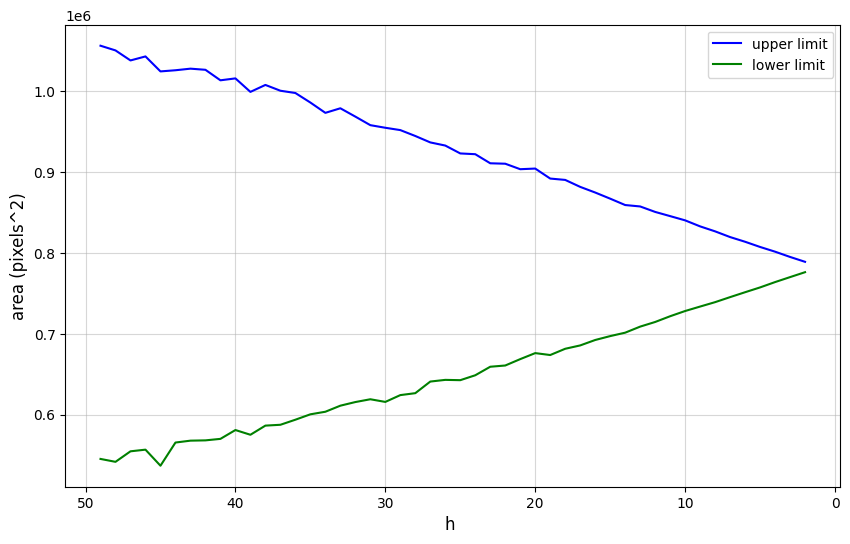

In [38]:
h_values_limit = list(range(2, 50))  
upper_areas = []  
lower_areas = []  

for h in h_values_limit:
    upper_cells = count_any_black_cells(imagen_binarizada, h)
    upper_area = area(upper_cells, h)
    upper_areas.append(upper_area)

    lower_cells = count_all_black_cells(imagen_binarizada, h)
    lower_area = area(lower_cells, h)
    lower_areas.append(lower_area)


plt.figure(figsize=(10, 6))

# upper bound graph
plt.plot(h_values_limit, upper_areas, label='upper limit', linestyle='-', color='blue')

# lower bound
plt.plot(h_values_limit, lower_areas, label='lower limit', linestyle='-', color='green')

# invertir el eje x
plt.gca().invert_xaxis()


plt.xlabel('h ', fontsize=12)
plt.ylabel('area (pixels^2)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()



El método de estimación del área **mediante mallas equiespaciadas** demuestra ser una herramienta útil para aproximar áreas encerradas en imágenes binarizadas. Sin embargo, al analizar los resultados, queda claro que la precisión final de la estimación está limitada por la resolución de los píxeles en la imagen original.


Desarrollamos la función `number_pixels` para contar todos los pixeles de forma más exacta y rápida. 
Comprobamos que el resultado es el mismo que para una malla de h = 1.

In [39]:
def number_pixels(imagen):
    """
    returns the number of white and black pixels in the image
    """
    white_cells = 0
    black_cells = 0

    for y in range(imagen.shape[0]):  # rows
        for x in range(imagen.shape[1]):  #columns
            pixel = imagen[y, x]

            if pixel == 255:
                white_cells += 1
            elif pixel == 0:
                black_cells +=1

    return white_cells, black_cells

number_pixels(imagen_binarizada)

(7917257, 782583)

De hecho, este método presenta un nuevo problema: obtener la proporción pixeles/metros. Tomamos la exploración de otros métodos como opción.

# Estimación del área mediante el Método de Monte Carlo

En primer lugar hemos hecho un preprocesmiento de la imagen en la que la hemos ajustado a un tamaño A4 y hemos tomado estas medidas.

Tomaremos la posibilidad de que se trate de calcular el área de un lago para orientarnos mejor.

1. **Medidas tomadas**:  
   - La imagen fue ajustada a tamaño A4 con dimensiones de $  29.7 \, \text{cm} \times 21 \, \text{cm}  $.  
   - La escala se midió en Photoshop, resultando en $ 2.97 \, \text{cm} $ para representar 50 m de la imagen.  

<br>

2. **Con los datos podemos medir las siguientes magnitudes**: 

- **prop**: Proporción de agua en la imagen, estimada como (resultado de aplicar Montecarlo):
  $$
  \text{prop} = \frac{\text{puntos\_agua}}{\text{puntos\_totales}}
  $$

- **A**: Área total del folio (en m²), calculada como:
  $$
  A = (29.7 \times 21) \times \left( \frac{50}{2.97} \right)^2
  $$

- **A_lago**: Área estimada del lago (en m²), obtenida como:
  $$
  A_{\text{lago}} = A \times \text{prop}
  $$



In [40]:
A = (29.7 * 21) * (50/2.97) ** 2

In [41]:
#importamos la image preprocesada y comprobamos que las dimensiones sean las adecuadas

from random import random

img = Image.open("imagen_A4.png").convert("L")
height, width = img.size

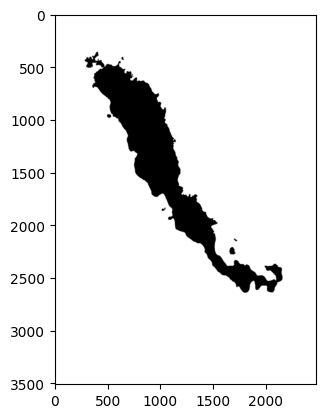

In [42]:
plt.imshow(img, interpolation='bilinear', cmap='gray')

In [43]:
from random import randint

#genera un punto aleatorio que perteneza a la imagen
def get_random_point():
    return (randint(0, height - 1), randint(0, width - 1))

In [44]:
n_puntos = 1_000

In [45]:
puntos_agua = []
puntos_tierra = []

#El umbral marca en que punto empezamos a considerar un punto agua, no lo ponemos a 255 puesto que esto puede dar lugar a error.
umbral = 50

pixeles_agua = 0

for i in range(n_puntos):
    punto = get_random_point()
    pixel = img.getpixel(punto)
    
    #caso agua
    if pixel < umbral: 
        pixeles_agua += 1
        puntos_agua.append(punto)
    #caso tierra
    else:
        puntos_tierra.append(punto)
        
    
proporcion_agua = pixeles_agua / n_puntos
print(proporcion_agua)
print(pixeles_agua)

0.09
90


Ploteamos los resultados

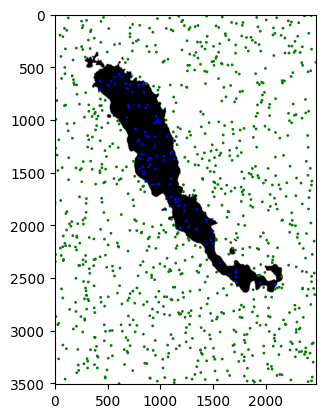

In [46]:
x_tierra, y_tierra = list(zip(*puntos_tierra))
x_agua, y_agua = list(zip(*puntos_agua))

plt.imshow(img, interpolation='bilinear', cmap='gray')
plt.scatter(x_tierra, y_tierra, color='green', s = [1] * len(puntos_tierra))
plt.scatter(x_agua, y_agua, color='blue', s = [1] * len(puntos_agua))

 $$
  A_{\text{lago}} = A \times \text{prop}
  $$



In [47]:
area_lago = A * proporcion_agua
print(f"El area del lago son {area_lago} m cuadrados.")

El area del lago son 15909.090909090904 m cuadrados.


vamos a hacer ahora el mismo proceso con más puntos

In [48]:
n_puntos = 10_000_000

In [49]:
puntos_generados = []
puntos_agua = []
puntos_tierra = []
a_estimados = []

pixeles_agua = 0

for i in range(n_puntos):
    punto = get_random_point()
    puntos_generados.append(punto)
    pixel = img.getpixel(punto)
    
    if pixel < umbral: #caso tierra
        pixeles_agua += 1
        puntos_agua.append(punto)
    else:
        puntos_tierra.append(punto)
        
    proporcion_agua = pixeles_agua / (i + 1)
    a_estimada = A * proporcion_agua

    a_estimados.append(a_estimada)
    


print(f"El area del lago son {a_estimados[-1]} m cuadrados.")
print(proporcion_agua)
print(pixeles_agua)

El area del lago son 15780.633838383834 m cuadrados.
0.0892733
892733


Vamos a comprobar la valided del resultado haciendo los siguientes plots

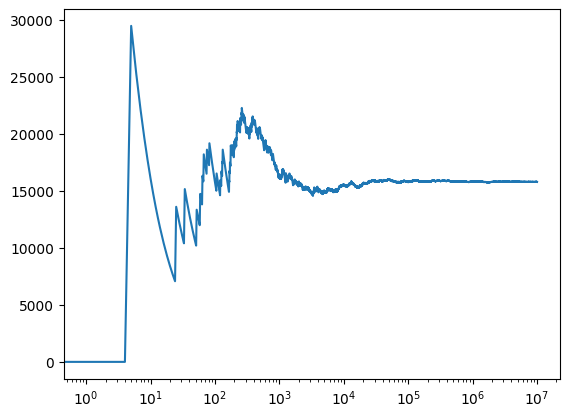

In [50]:
plt.plot(range(len(a_estimados)), a_estimados)
plt.xscale('log')

Como esperábamos, parece que la proporcián se estabiliza lo cual, indica un resultado fiable

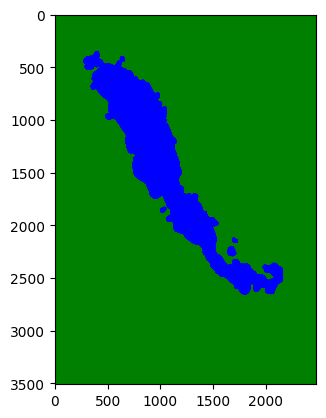

In [51]:
x_tierra, y_tierra = list(zip(*puntos_tierra))
x_agua, y_agua = list(zip(*puntos_agua))

plt.imshow(img, interpolation='bilinear', cmap='gray')
plt.scatter(x_tierra, y_tierra, color='green', s = [1] * len(puntos_tierra))
plt.scatter(x_agua, y_agua, color='blue', s = [1] * len(puntos_agua))

La imagen ha quedado completamente coloreada con los puntos lo cual de nuevo apoya la fiabilidad de la estimación.

------------------
## Caso 3 — Estimación funcional

Observa los siguientes pares de valores $x$, $y$. Predice cuál será el valor asociado a un $x=-0.16$

<center>

|      $x$      |     $y$      |
|-------------|------------|
|  0.808      | 1.081      |
|  0.087      | 3.166      |
| -0.359      | 1.801      |
| -0.281      | 1.949      |
|  0.257      | 2.024      |
|  0.279      | 1.979      |
|  0.604      | 1.275      |
| -0.303      | 1.880      |
|  0.722      | 1.126      |
| -0.760      | 1.130      |
|  0.407      | 1.627      |
|  0.215      | 2.247      |
| -0.912      | 1.081      |
|  0.013      | 5.006      |
| -0.972      | 1.032      |


</center>


## Visualizacion del enunciado:

In [3]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datos proporcionados
x_vals = np.array([0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 
                   0.407, 0.215, -0.912, 0.013, -0.972])
y_vals = np.array([1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130,
                   1.627, 2.247, 1.081, 5.006, 1.032])

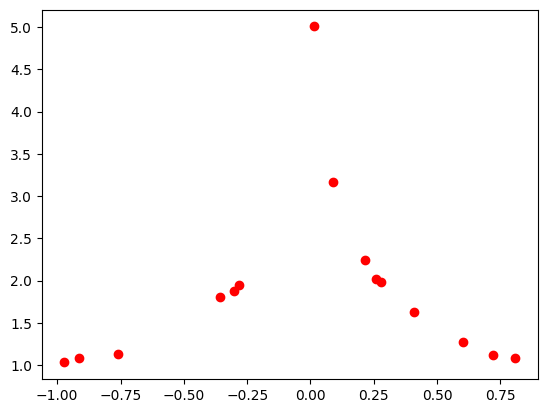

In [4]:
plt.plot(x_vals, y_vals, "ro")


## Idea 1:

Observando los datos parece haver un comportamiendo asintotico tanto ertical como horizontal, lo cual sugiere una regresion por combinacion lineal de funciones. en concreto elegimos
 $$
  \sum_{i=2}^{n} c_i \cdot x^{-i}
 $$

In [5]:
df = pd.DataFrame({"y_vals": y_vals, "x_vals": x_vals})

In [6]:
grado_minimo_negativo = 5

for i in range(2, grado_minimo_negativo + 1):
    print(i)
    df[f"x_vals_{i}"] = abs(df["x_vals"] ** -i)
    

2
3
4
5


In [7]:
df

,y_vals,x_vals,x_vals_2,x_vals_3,x_vals_4,x_vals_5
0,1.081,0.808,1.531713,1.895684,2.346143e+00,2.903643e+00
1,3.166,0.087,132.117849,1518.595967,1.745513e+04,2.006336e+05
2,1.801,-0.359,7.759096,21.613080,6.020356e+01,1.676980e+02
3,1.949,-0.281,12.664480,45.069324,1.603891e+02,5.707795e+02
4,2.024,0.257,15.140275,58.911574,2.292279e+02,8.919374e+02
5,1.979,0.279,12.846700,46.045521,1.650377e+02,5.915330e+02
6,1.275,0.604,2.741108,4.538258,7.513672e+00,1.243985e+01
7,1.880,-0.303,10.892178,35.947783,1.186395e+02,3.915497e+02
8,1.126,0.722,1.918340,2.656981,3.680029e+00,5.096993e+00
9,1.130,-0.760,1.731302,2.278029,2.997406e+00,3.943956e+00


In [8]:
df.columns

Index(['y_vals', 'x_vals', 'x_vals_2', 'x_vals_3', 'x_vals_4', 'x_vals_5'], dtype='object')

In [9]:
regressor = LinearRegression()

X = df.iloc[:, 2:].values
y = df[['y_vals']].values

regressor.fit(X, y)

LinearRegression()

In [10]:
#Estos son los valores que nos permiten recuperar la expresion analitica de la funcion.

regressor.coef_, regressor.intercept_

(array([[ 2.19803987e-01, -4.63587565e-02,  2.84234842e-03,
         -2.95972663e-05]]),
 array([0.85101407]))

Lo bueno de este método esque ahora con estos datos podemos reconstruir la función. El problema es que parece haber seleccionado pesos negaivos, por lo que se alejara de la forma que estamos pensando. Vamos a escribir la "prediccion analítica" y confirmar que la forma no es la deseada.

In [11]:
def x_procesada(x):
    return [x ** -i for i in range(2, grado_minimo_negativo + 1)]


(0.0, 5.0)

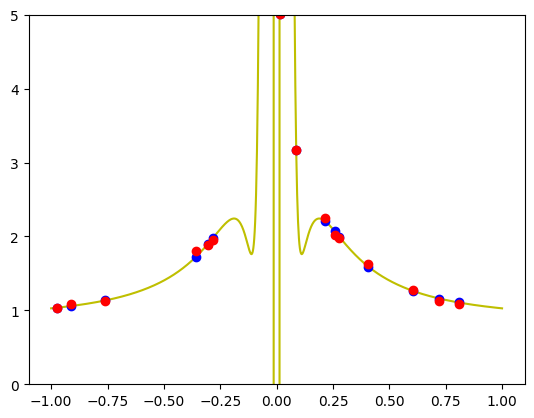

In [12]:
def fun(x):
    resultado = 0
    for i, coef in enumerate(regressor.coef_[0][:]):
        resultado += coef * abs(x ** (-(2 + i)))
        
    return resultado + regressor.intercept_

v_fun = np.vectorize(fun)
        
x_plot = np.linspace(-1, 1, 1000)
y_plot = list(map(fun, x_plot))

plt.plot(x_plot, y_plot, "y")
plt.plot(x_vals, regressor.predict(X), "bo")
plt.plot(x_vals, y_vals, "ro")
plt.ylim([0, 5])

Efectivamente , los resultados no son malos, pero claramente no generalizara bien el modelo por culpa de los pesos negativos. En este punto podríamos forzar que fueran positivos personalizando más el modelo, pero, preferimos explorar otras ideas.

## Ideas 2.1

Puesto que lo que queremos es una aproximación suave de los datos, parece intuitivo probar, al menos, que resultado nos da la interpolación por [splines cúbicos](https://es.wikipedia.org/wiki/Spline).

In [13]:
x_vals = np.array([0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 
                   0.407, 0.215, -0.912, 0.013, -0.972])
y_vals = np.array([1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130,
                   1.627, 2.247, 1.081, 5.006, 1.032])

In [14]:
x_vals, y_vals = np.array(sorted(zip(x_vals, y_vals), key = lambda x: x[0])).T

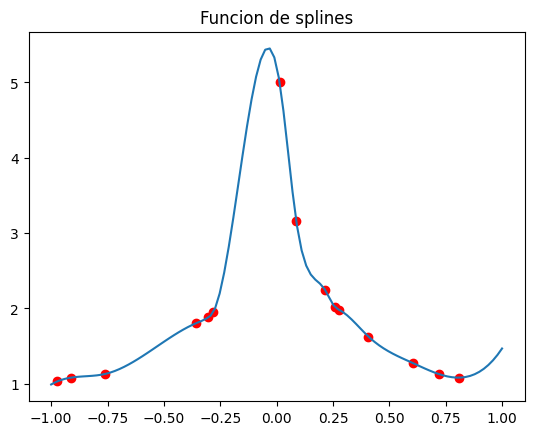

In [15]:
splines = CubicSpline(x_vals, y_vals)

x_plot = np.linspace(-1, 1, 100)
y_aproximada = splines(x_plot)

plt.plot(x_vals, y_vals, "ro")
plt.plot(x_plot, y_aproximada)
plt.title("Funcion de splines")
plt.show()

El resultado es mejor pero vamos explorar mas ideas.

## Ideas 2.2

Con la misma premisa pero esta vez sin necesidad de cumplir la condición de interpolación, vamos a buscar alguna manera de hacer una aproximación suave de los datos con sk-learn. parece que una buena opción es usar SVR, un modelo de aprendizaje supervisado que ya viene listo para usar.



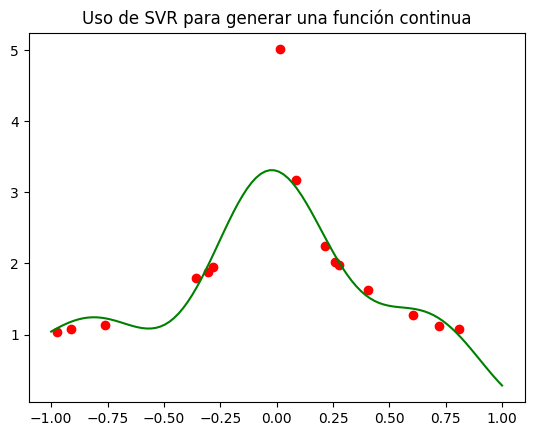

In [16]:
from sklearn.svm import SVR

# Datos proporcionados
x_vals = np.array([0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 
                   0.407, 0.215, -0.912, 0.013, -0.972])
y_vals = np.array([1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130,
                   1.627, 2.247, 1.081, 5.006, 1.032])

# Crear DataFrame
df = pd.DataFrame({"y_vals": y_vals, "x_vals": x_vals})

# Preprocesar los datos para el modelo SVR
X = df[['x_vals']].values
y = df['y_vals'].values

# Ajustar el modelo SVR (Se usa un kernel RBF para suavizar la función)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)

# Ajuste del modelo SVR
svr.fit(X, y)

# Generar valores predichos por el modelo para un rango más amplio de x
x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
y_svr = svr.predict(x_plot)

# Graficar los resultados
plt.plot(x_vals, y_vals, "ro", label="Datos originales")  # Puntos originales
plt.plot(x_plot, y_svr, "g-", label="Predicción SVR (suave y continua)")  # Predicción suave
plt.title("Uso de SVR para generar una función continua")
plt.show()

En este caso el resultado se aleja mucho del eperado.

## Idea 3

En este punto jugamos en una herramienta online para dibjuar funciones ([Geogebra](https://www.geogebra.org/classic?lang=es)) para ver que función se puede comportar de este modo.

Acabamos llegando a esta clase de funciones exponenciales, que dan resultados prometedores.

$$ f(x) = a \cdot e^{-b \cdot |x|} + c $$

la idea es encontrar parámetros que se ajusten lo mejor podible a los puntos.



<img src="img_1.png">

In [17]:
from scipy.optimize import curve_fit

def modelo(x, a, b, c):
    return a * np.exp(-b * np.abs(x)) + c

parametros_ini = [5, 1, 1]  # Suposición inicial de los parámetros
parametros_optimos, covarianza = curve_fit(modelo, x_vals, y_vals, p0=parametros_ini)

a_opt, b_opt, c_opt = parametros_optimos
print(f"a = {a_opt} b = {b_opt} c = {c_opt}")

x_pred = -0.16
y_pred = modelo(x_pred, a_opt, b_opt, c_opt)
print(f"x = {x_pred} y = {y_pred:.3f}")

a = 3.9936864246674784 b = 5.662535747794341 c = 1.10212398501903
x = -0.16 y = 2.716


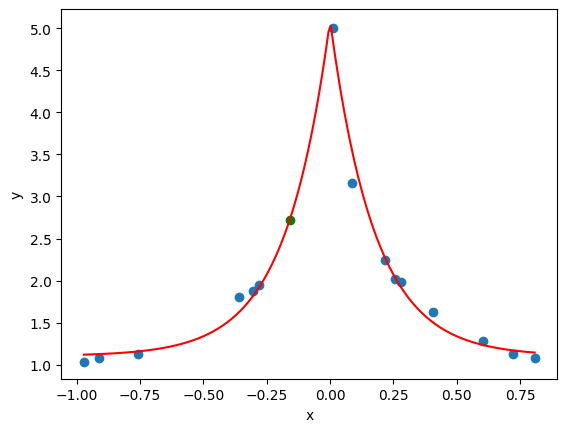

In [18]:
x_ajuste = np.linspace(min(x_vals), max(x_vals), 200)
y_ajuste = modelo(x_ajuste, a_opt, b_opt, c_opt)

plt.scatter(x_vals, y_vals)
plt.plot(x_ajuste, y_ajuste, color='red',)
plt.scatter(x_pred, y_pred, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


El resultado en este caso si nos parece satisfactorio por lo que nos quedamos con la prediccion de este modelo la cual esta marcada en verde.

In [19]:
print(y_pred)

2.71611338239095


------------------
## Caso 4 — Subasta de 5€

El día 28 de noviembre, en clase subastaré un billete de 5€. La subasta tiene unas normas un poco especiales:
 - El objetivo es pujar para ganar un billete de 5€.
 - El ganador recibirá 5€, pero a diferencia de las subastas "normales", **tanto el ganador como el subcampeón deberán pagar la cantidad de sus ofertas**.
 - Las ofertas deben aumentarse en incrementos mínimos de 20 céntimos.
 - No hay límites en la cantidad de rondas de pujas.

Ejemplo: imagina que el grupo A comienza la puja por 20 céntimos. El grupo B sube la puja a 40 céntimos. El grupo A vuelve a subir la puja a 80 céntimos. Ahora el grupo C sube la puja a 1€ y 40 céntimos. No hay más pujas: el grupo B paga 80 céntimos. El grupo C paga 1€ y 40 céntimos, y recibe el billete de 5€.

Si no pujas, no pierdes nada, y puedes ganar 5€ por una pequeña cantidad. Esto quiere decir que el [valor esperado](https://en.wikipedia.org/wiki/Expected_value) del juego es positivo, lo que significa que es rentable jugar.

En el contexto de esta práctica, tu objetivo será **predecir la suma de las dos ofertas más altas** de la subasta.

# Análisis del Problema desde el Punto de Vista del Valor Esperado

Vamos a analizar el problema desde el punto de vista del valor esperado, una parámetro analíticamente equivalente a la media, que estima lo que ganarías de media jugando esta estrategia interactivamente, (solo vamos a hacer una subasta, pero creemos que tiene sentido plantear lo siguiente).

Sea \( X \) la apuesta que se hace. Solo se apuesta si:

$$
\text{Valor esperado} > \text{Pérdida esperada}
$$

Es decir, debemos garantizar que nuestra estrategia sea viable a largo plazo. Esto se cumple si el valor esperado compensa las posibles pérdidas. Planteamos las siguientes expresiones:

$$
\text{Valor esperado} = P_{\text{ganar}}(X) \cdot (5 - X)
$$

$$
\text{Pérdida esperada} = P_{\text{perder}}(X) \cdot X
$$

## Desarrollo de la desigualdad:

La condición para apostar se escribe como:

$$
P_{\text{ganar}}(X) \cdot (5 - X) > P_{\text{perder}}(X) \cdot X
$$

Distribuyendo y reorganizando los términos:

$$
5 \cdot P_{\text{ganar}}(X) - P_{\text{ganar}}(X) \cdot X > P_{\text{perder}}(X) \cdot X
$$

Factorizamos \( X \) en los términos correspondientes:

$$
5 \cdot P_{\text{ganar}}(X) > X \cdot \big(P_{\text{perder}}(X) + P_{\text{ganar}}(X)\big)
$$

Dividimos ambos lados por 
$$
P_{\text{ganar}}(X) + P_{\text{perder}}(X)
$$
Suponiendo que esta cantidad es positiva:

$$
X < \frac{5 \cdot P_{\text{ganar}}(X)}{P_{\text{ganar}}(X) + P_{\text{perder}}(X)}
$$

## Extraccion de conclusiones:

Ahora tenemos una expresión analítica de la cota superior de X, sin embargo, no conocemos las funciones de densidad de probabilidad, que estiman la probabilidad de ganar o de perder en función de la cantidad apostada.

Para encontrar esta cota superior, planteamos dos posibles métodos:

1. Encontrar una relación analitítica entre $$P_{\text{ganar}}(X)\ y \ P_{\text{perder}}(X) $$.
2. Estimar que funciones deberían de seguir estas funciones de densidad.

### Vamos a desarrollar el primer metodo:

Creemos que puede tener sentido plantear la siguiente relación $$P_{\text{ganar}}(X)\ = \ P_{\text{perder}}(X) $$ Con el objetivo de modelar un escernario el que todo el mundo juega de manera optima da tal manera que la probabilidad de ganar es igual a la probabilidad de perder, es decir quedar primero o segundo. Con esto podemos resolver para la cota superior de X.

$$
X < \frac{1}{2} \cdot 5 = 2.5
$$

Es decir las las apuestas de los jugadores deben estar acotadas superiormente por 2.50 euros.


Sin embargo, es posible que asumir esto sea demasiado restrictivo, por lo que desarrollaremos el segundo método para comparar resultados.

Podemos asumir varias cosas de las funciones de densidad.

- Debe existir una relación entre ambas, ya que la $ P_{\text{perder}}(X) $ mía debe ser igual a la $ P_{\text{ganar}}(X + incremento) $ de el jugador que me gane, ya que solo pierdo si un jugador apuesta más que yo y nadie apuesta más que el.
- vamos a fijar este incremente como 0.20 asumiendo de este modo que la diferencias en las apuestas de el que gana y el que pierde es del incremento mínimo algo que es muy común en las subastas.
- Entonces conseguirmos expresar $ P_{\text{perder}}(X) = P_{\text{ganar}}(X + 0.20)$ 
- Se debe alcanzar la probabilidad de cero si se apuesta 0 y la probabilidad de 1 si se apuestan 5 euros, asumiendo que nadie va a apostar teniendo la garantia de perder dinero.



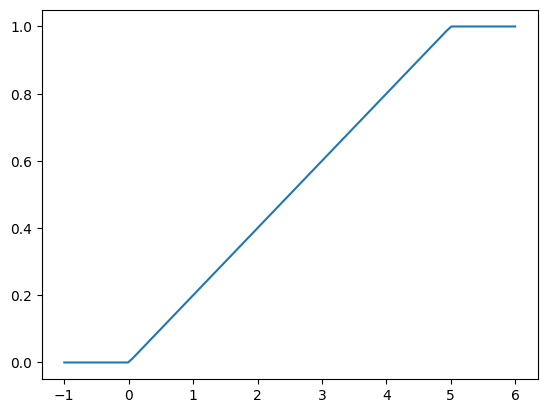

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def p_ganar_lineal(x):
    if x < 0:
        return 0
    if 0 <= x <= 5:
        return x / 5
    else:
        return 1
    
plt.plot(np.linspace(-1, 6, 100), list(map(p_ganar_lineal, np.linspace(-1, 6, 100))))

In [21]:
from scipy.optimize import root

# Función P_perder
def p_perder(x, p_ganar):
    return p_ganar(x + 0.2)

# Calcular la cota superior
def cota_superior_apuesta(p_ganar):
    # La función objetivo que queremos anular
    def fun(x):
        return (5 * p_ganar(x)) / (p_ganar(x) + p_perder(x, p_ganar)) - x

    # Resolver la raíz
    sol = root(fun, x0=[1])  # x0 es el punto inicial
    return sol

def printear_cota_superior(p_ganar):

    # Llamada a la función
    resultado = cota_superior_apuesta(p_ganar)
    
    # Imprimir el resultado
    if resultado.success:
        print(f"Cota superior encontrada: {resultado.x[0]}")
    else:
        print("No se encontró una solución.")

proponemos otra funcion que quizas se aguste mas a la real, a la cual llegamos jugando con interoplacion de legrange en geogebra.

<img src="img.png">

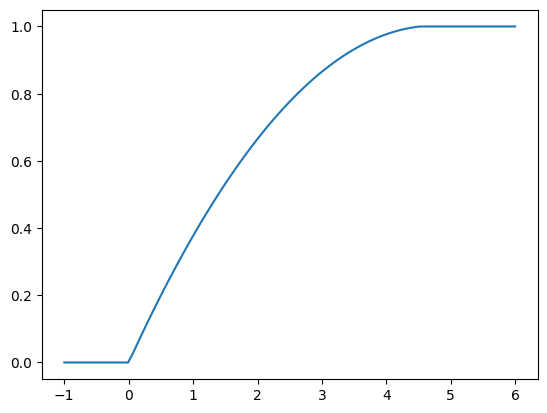

In [22]:
def p_ganar_personalizado(x):
    def expr(x):
        a, b = 13, -2
        return (x * (x - a)) / (5 * (5 - a)) + b * (x * (x - 5)) / (a * (a - 5))
    if x < 0:
        return 0
    if 0 <= x <= 5:
        valor = expr(x)
        
        if valor >= 1:
            return 1
        else:
            return valor
    else:
        return 1
    
plt.plot(np.linspace(-1, 6, 100), list(map(p_ganar_personalizado, np.linspace(-1, 6, 100))))

In [23]:
printear_cota_superior(p_ganar_personalizado)

Cota superior encontrada: 2.437225210369047


## Solucion propuesta:
Los tres métodos han llegado a resultados muy cercanos. Nos vamos a quedar con la últimas de las soluciones y vamos a decir que última puja será de 2.40 y como estamos asumiendo una diferencia de 20 céntimos entre esta y la penúltima.

El resultado final es de **4.60 euros** que se pagaran por el billete.

------------------
## Caso 5 — Experimento físico

En clase se describirá un experimento físico que se llevará a cabo el día 28 de noviembre. Presta atención a los datos dados y a la variable a predecir.




### Datos Iniciales:

1. **Masa de la canica**: $6 \, \text{g} = 0.006 \, \text{kg}$.
2. **Radio de la canica**: $0.8 \, \text{cm} = 0.008 \, \text{m}$.
3. **Altura del plano inclinado**: $3.2 \, \text{cm} = 0.032 \, \text{m}$.
4. **Longitud del plano inclinado**: $66 \, \text{cm} = 0.66 \, \text{m}$.
5. **Altura desde la base hasta el suelo**: $76.7 \, \text{cm} = 0.767 \, \text{m}$.


---

### Desarrollo del Problema:

Analizamos el movimiento de una canica que rueda sin deslizar por un plano inclinado y luego describe una trayectoria parabólica al caer al suelo. Calcularemos las componentes de la velocidad de salida y la distancia horizontal recorrida.

<img src="planteamiento_canica.png" alt="no ha cargao" width="500"/>



---

#### **1. Energía Mecánica y Velocidad de Salida ($V$)**

Utilizamos la conservación de la energía mecánica para determinar la velocidad de la canica al final del plano inclinado.

1. **Energía potencial inicial ($E_{\text{pot}}$)**:

   $$
   E_{\text{pot}} = mgh
   $$
   Donde:
   - $m = 0.006 \, \text{kg}$
   - $g = 9.8 \, \text{m/s}^2$
   - $h = 0.032 \, \text{m}$

2. **Energía cinética al final ($E_{\text{cin}}$)**:

   La energía cinética total es la suma de la energía cinética translacional y rotacional:

   $$
   E_{\text{cin}} = \frac{1}{2}mv^2 + \frac{1}{2}I\omega^2
   $$
   Donde:
   - $I$ es el momento de inercia de una esfera sólida:
     $$
     I = \frac{2}{5}mr^2
     $$
   - $\omega$ es la velocidad angular:
     $$
     \omega = \frac{v}{r}
     $$

   Sustituyendo $I$ y $\omega$:

   $$
   \begin{align*}
   E_{\text{cin}} &= \frac{1}{2}mv^2 + \frac{1}{2}\left(\frac{2}{5}mr^2\right)\left(\frac{v}{r}\right)^2 \\
   &= \frac{1}{2}mv^2 + \frac{1}{5}mv^2 \\
   &= \left(\frac{1}{2} + \frac{1}{5}\right)mv^2 = \frac{7}{10}mv^2
   \end{align*}
   $$

3. **Conservación de la energía**:

   Igualando la energía potencial inicial y la energía cinética final:

   $$
   mgh = \frac{7}{10}mv^2
   $$
   Simplificando:

   $$
   gh = \frac{7}{10}v^2
   $$
   Despejando $v$:

   $$
   v = \sqrt{\frac{10}{7}gh}
   $$
   Sustituyendo valores:

   $$
   v = \sqrt{\frac{10}{7} \times 9.8 \, \text{m/s}^2 \times 0.032 \, \text{m}} \approx 0.67 \, \text{m/s}
   $$

#### **2. Componentes de la Velocidad de Salida**

La canica sale con una velocidad $V$ formando un ángulo $\alpha$ respecto a la horizontal.

1. **Cálculo del ángulo ($\alpha$)**:

   $$
   \sin \alpha = \frac{\text{altura del plano}}{\text{longitud del plano}} = \frac{0.032}{0.66}
   $$
   $$
   \alpha = \arcsin\left(\frac{0.032}{0.66}\right) \approx 2.78^\circ
   $$

2. **Componentes de la velocidad**:

   - **Componente horizontal ($V_x$)**:

     $$
     V_x = V \cos \alpha = 0.67 \, \text{m/s} \times \cos(2.78^\circ) \approx 0.669 \, \text{m/s}
     $$

   - **Componente vertical ($V_y$)**:

     $$
     V_y = V \sin \alpha = 0.67 \, \text{m/s} \times \sin(2.78^\circ) \approx 0.0325 \, \text{m/s}
     $$

#### **3. Tiempo de Caída ($t$)**

Calculamos el tiempo que tarda en caer desde una altura $H = 0.767 \, \text{m}$ utilizando la ecuación del movimiento vertical:

$$
H = V_y t + \frac{1}{2}gt^2
$$

Considerando $V_y$ positivo hacia arriba y $g$ positivo hacia abajo, y dado que $V_y$ es pequeño, podemos aproximar:

$$
H = \frac{1}{2}gt^2
$$
Despejando $t$:

$$
t = \sqrt{\frac{2H}{g}} = \sqrt{\frac{2 \times 0.767 \, \text{m}}{9.8 \, \text{m/s}^2}} \approx 0.396 \, \text{s}
$$

#### **4. Distancia Horizontal ($d$)**

La distancia horizontal recorrida es:

$$
d = V_x t = 0.669 \, \text{m/s} \times 0.396 \, \text{s} \approx 0.265 \, \text{m}
$$

---

### **Resultado Final**

- **Distancia horizontal recorrida:** $d \approx 26.5 \, \text{cm}$.


------------------
## Caso 6 — Predicción deportiva

El fin de semana del 29 Nov - 1 Dic se juega el partido O. Lyon vs Niza (*Ligue 1*, Francia). Tu objetivo es predecir el **número de corners que sacará el Niza** en ese partido. Tienes a tu disposición muchos datos históricos, por ejemplo en [esta web](https://www.football-data.co.uk/data.php).

In [2]:
import pandas as pd
import numpy as np
import sklearn

Creamos el dataframe con datos desde el 2020.

In [3]:
import pandas as pd

years = [2020, 2021, 2022, 2023, 2024, 2025]
dataframes = {}

for year in years:
    dataframes[f"df_{year}"] = pd.read_csv(f'datasets/datos_{year}.csv')

In [4]:
df_filtrados = []

for key, value in dataframes.items():
    df_filtrado = value[["HomeTeam", "AwayTeam", "Date","HC", "AC"]]
    df_filtrados.append(df_filtrado)
    
df_completo = pd.concat(df_filtrados).reset_index(drop=True)

In [5]:
df_completo = df_completo[(df_completo["HomeTeam"] == "Nice") | (df_completo["AwayTeam"] == "Nice")].reset_index(drop=True)



In [6]:
#Esto es una lica que almacena 0 si el niza juega como local y 1 en caso contrario y nos sera útil mas adelante.

lista_local = (df_completo["HomeTeam"] != "Nice").astype(int).to_list()

In [7]:
df_completo

,HomeTeam,AwayTeam,Date,HC,AC
0,Nice,Amiens,10/08/2019,7,3
1,Nimes,Nice,17/08/2019,2,1
2,Nice,Marseille,28/08/2019,4,3
3,Rennes,Nice,01/09/2019,8,6
4,Montpellier,Nice,14/09/2019,8,1
...,...,...,...,...,...
183,Nantes,Nice,20/10/2024,4,8
184,Nice,Monaco,27/10/2024,6,6
185,Brest,Nice,02/11/2024,6,2
186,Nice,Lille,10/11/2024,6,2


Una vez extraídos los datos que queremos vamos a sintetizarlos y a simplificarlos, de modo que nos quedamos con las siguientes columnas.

fecha:
oponente:
estadio:
corners:

In [8]:
#Condensamos las columnas en una con el oponente del Niza

lista_oponentes = []

for i, fila in enumerate(np.array(df_completo.loc[:, ["HomeTeam", "AwayTeam"]])):
    lista_oponentes.append(fila[int(not bool(lista_local[i]))])


In [9]:
#Nos quedamos en cada caso unicamente con los corners del Niza.

corners_niza = []

for i, fila in enumerate(np.array(df_completo.loc[:, ["HC", "AC"]])):
    corners_niza.append(fila[lista_local[i]])

In [10]:
df_entrenamiento = pd.DataFrame({
    "fecha": df_completo["Date"],
    "oponente" : lista_oponentes,
    "estadio" : lista_local,
    "corners": corners_niza
})

In [11]:
df_entrenamiento

,fecha,oponente,estadio,corners
0,10/08/2019,Amiens,0,7
1,17/08/2019,Nimes,1,1
2,28/08/2019,Marseille,0,4
3,01/09/2019,Rennes,1,6
4,14/09/2019,Montpellier,1,1
...,...,...,...,...
183,20/10/2024,Nantes,1,8
184,27/10/2024,Monaco,0,6
185,02/11/2024,Brest,1,2
186,10/11/2024,Lille,0,6


El siguiente paso es codificar los datos para poder dárselo a un modelo. Elegimos un **label encoder** para los oponentes, vamos a **pasar a timestamp** las fechas.

In [12]:
df_preprocesado = df_entrenamiento.copy()

timestamps = pd.to_datetime(df_preprocesado["fecha"], format="%d/%m/%Y").astype('int64')
df_preprocesado["fecha"] = timestamps


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
oponentes_codificados = encoder.fit_transform(df_preprocesado["oponente"])

df_preprocesado["oponente"] = oponentes_codificados


In [14]:
X = df_preprocesado.iloc[:, :-1].values
y = df_preprocesado.iloc[:, -1].values.reshape(-1, 1)

In [15]:
df_preprocesado

,fecha,oponente,estadio,corners
0,1565395200000000000,1,0,7
1,1566000000000000000,18,1,1
2,1566950400000000000,13,0,4
3,1567296000000000000,21,1,6
4,1568419200000000000,16,1,1
...,...,...,...,...
183,1729382400000000000,17,1,8
184,1729987200000000000,15,0,6
185,1730505600000000000,5,1,2
186,1731196800000000000,10,0,6


Ya tenemos los datos válidos para alimentar un modelo, a continuación lo entrenaremos.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestRegressor

regresor = RandomForestRegressor(n_estimators=100, random_state=0)

regresor.fit(X_train, y_train)

c:\Users\34640\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [41]:
from sklearn.metrics import mean_absolute_error

error_medio_train = mean_absolute_error(y_train, regresor.predict(X_train))
error_medio_test = mean_absolute_error(y_test, regresor.predict(X_test))

print(f"El error medio en valor absoluto en el dataset de entrenamiento es de {error_medio_train}")
print(f"El error medio en valor absoluto en el dataset de pruebas {error_medio_test}")

El error medio en valor absoluto en el dataset de entrenamiento es de 0.8684
El error medio en valor absoluto en el dataset de pruebas 2.443421052631579


Se observa algo de **sobreajuste** en los datos de entrenamiento, pero, sin duda, está prediciendo con cierto grado de precisión, por lo que pasamos las conclusiones.

praparamos la "query" para nuestro modelo.

In [42]:
#vemos que el Lyon para el modelo es el equipo 12.

list(enumerate(encoder.classes_))

[(0, 'Ajaccio'),
 (1, 'Amiens'),
 (2, 'Angers'),
 (3, 'Auxerre'),
 (4, 'Bordeaux'),
 (5, 'Brest'),
 (6, 'Clermont'),
 (7, 'Dijon'),
 (8, 'Le Havre'),
 (9, 'Lens'),
 (10, 'Lille'),
 (11, 'Lorient'),
 (12, 'Lyon'),
 (13, 'Marseille'),
 (14, 'Metz'),
 (15, 'Monaco'),
 (16, 'Montpellier'),
 (17, 'Nantes'),
 (18, 'Nimes'),
 (19, 'Paris SG'),
 (20, 'Reims'),
 (21, 'Rennes'),
 (22, 'St Etienne'),
 (23, 'Strasbourg'),
 (24, 'Toulouse'),
 (25, 'Troyes')]

In [43]:
fecha_partido = "01/12/2024"
timestamp = pd.to_datetime(fecha_partido, format="%d/%m/%Y").timestamp() * 10 ** 6

local = 1

#oponente = encoder.inverse_transform(["Lyon"])

datos_prediccion = [[timestamp, local, 12]]

In [44]:
regresor.predict(datos_prediccion)

array([4.33])